# Credit Card Fraud Classification 

In [42]:
# Importing all the packages 

#Importing the packages pandas,Numpy,SeaBorn,matplotlib,math and Numpy 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [4]:
# Importing Dataset

cc_data = pd.read_csv('C:/Users/Suraj/Jupyter Projects/Project 4_Credit Card Fraud Prediction/creditcard.csv')
cc_data.head(2)

#There are 662 rows and 31 columns and  Class is the target variable

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [3]:
cc_data.shape

(662, 31)

In [5]:
# Since most of them are numeric variables and are similar, EDA is not required and we will focus on the modelling part directly 


In [6]:
# SPLitting X and Y  

X= cc_data.drop("Class",axis=1)
y = cc_data["Class"]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logmodel=LogisticRegression()

In [11]:
logmodel.fit(X_train,y_train)

C:\Users\Suraj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [12]:
predictions = logmodel.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,predictions)

0.9547738693467337

In [30]:
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,predictions)

array([[190,   4],
       [  5,   0]], dtype=int64)

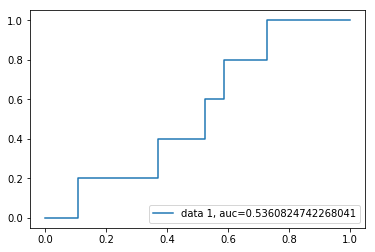

In [63]:
# From the confusion matrix we can see that the dataset is imbalanced . Also we are able to see that roc  
# Hence dataset needs to be balanced by keeping the positive class          

y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

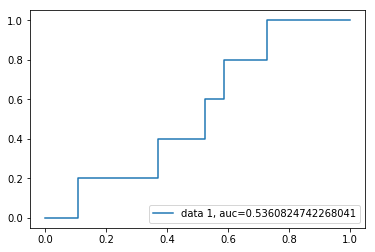

In [64]:
# Predict class probabilities
prob_y_2 = logmodel.predict_proba(X)

In [61]:
# Keep only the positive class
prob_y_2 = [predictions[1] for p in prob_y_2]

In [56]:
print( roc_auc_score(y, prob_y_2) )

# We can see that the ROC score of AUC is 78%

0.7796763675884556
